In [1]:
import scanorama
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath('/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis')
if module_path not in sys.path:
    sys.path.append(module_path)

import chrysalis as ch

plt.rcParams['svg.fonttype'] = 'none'

data_path = '/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis/data/fig_2/'

samples = ['V1_Mouse_Brain_Sagittal_Anterior_Section_2', 'V1_Mouse_Brain_Sagittal_Posterior_Section_2']

In [ ]:
adatas = []

for sample in samples:
    ad = sc.datasets.visium_sge(sample_id=sample)
    ad.var_names_make_unique()
    sc.pp.calculate_qc_metrics(ad, inplace=True)
    sc.pp.filter_cells(ad, min_counts=1000)
    sc.pp.filter_genes(ad, min_cells=10)
    sc.pp.normalize_total(ad, inplace=True)
    sc.pp.log1p(ad)
    adatas.append(ad)

adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

adata = ch.integrate_adatas(adatas_cor)
adata.write(data_path + 'mouse_ap_integrated.h5ad')

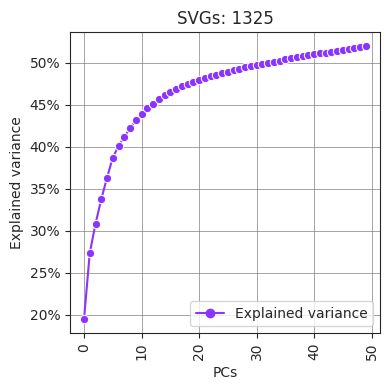

In [4]:
adata = sc.read_h5ad(data_path + 'mouse_ap_integrated.h5ad')
adata.var.index = adata.var['gene_symbols']
adata.var_names = adata.var['gene_symbols']
ch.pca(adata)

ch.plot_explained_variance(adata)
plt.show()

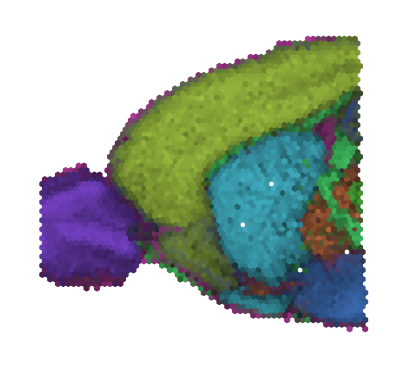

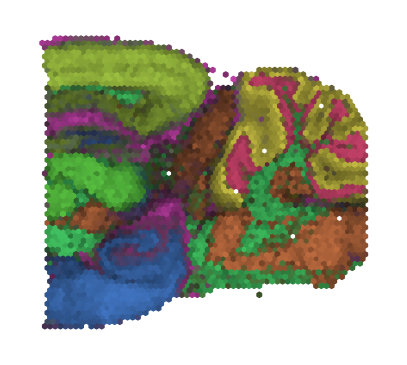

In [6]:
ch.aa(adata, n_pcs=20, n_archetypes=10)

ch.plot(adata, dim=10, sample_id=0, rasterized=True)
plt.show()

ch.plot(adata, dim=10, sample_id=1, rasterized=True)
plt.show()

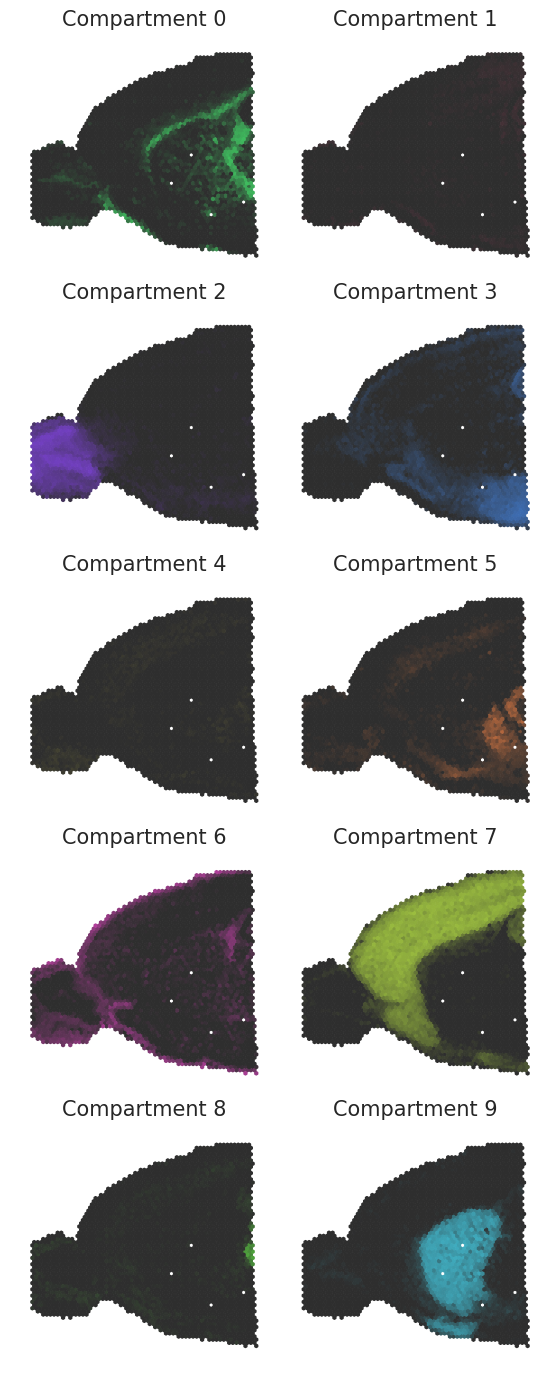

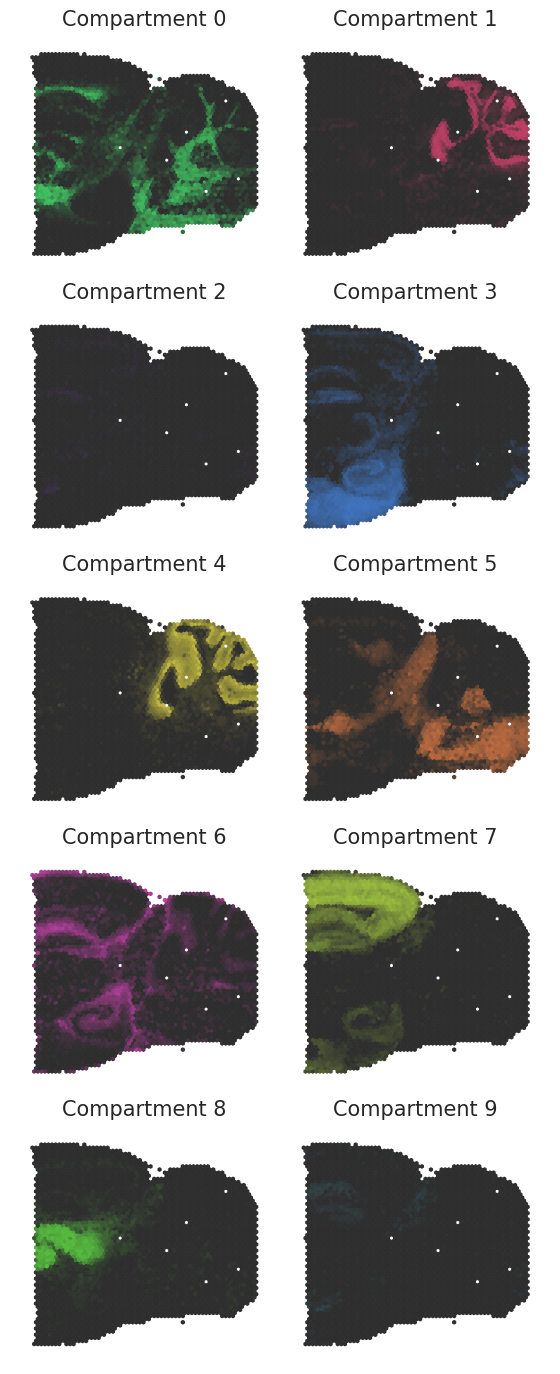

In [7]:
ch.plot_compartments(adata, sample_id=0, ncols=2, rasterized=True, title_size=15)
plt.show()
ch.plot_compartments(adata, sample_id=1, ncols=2, rasterized=True, title_size=15)
plt.show()

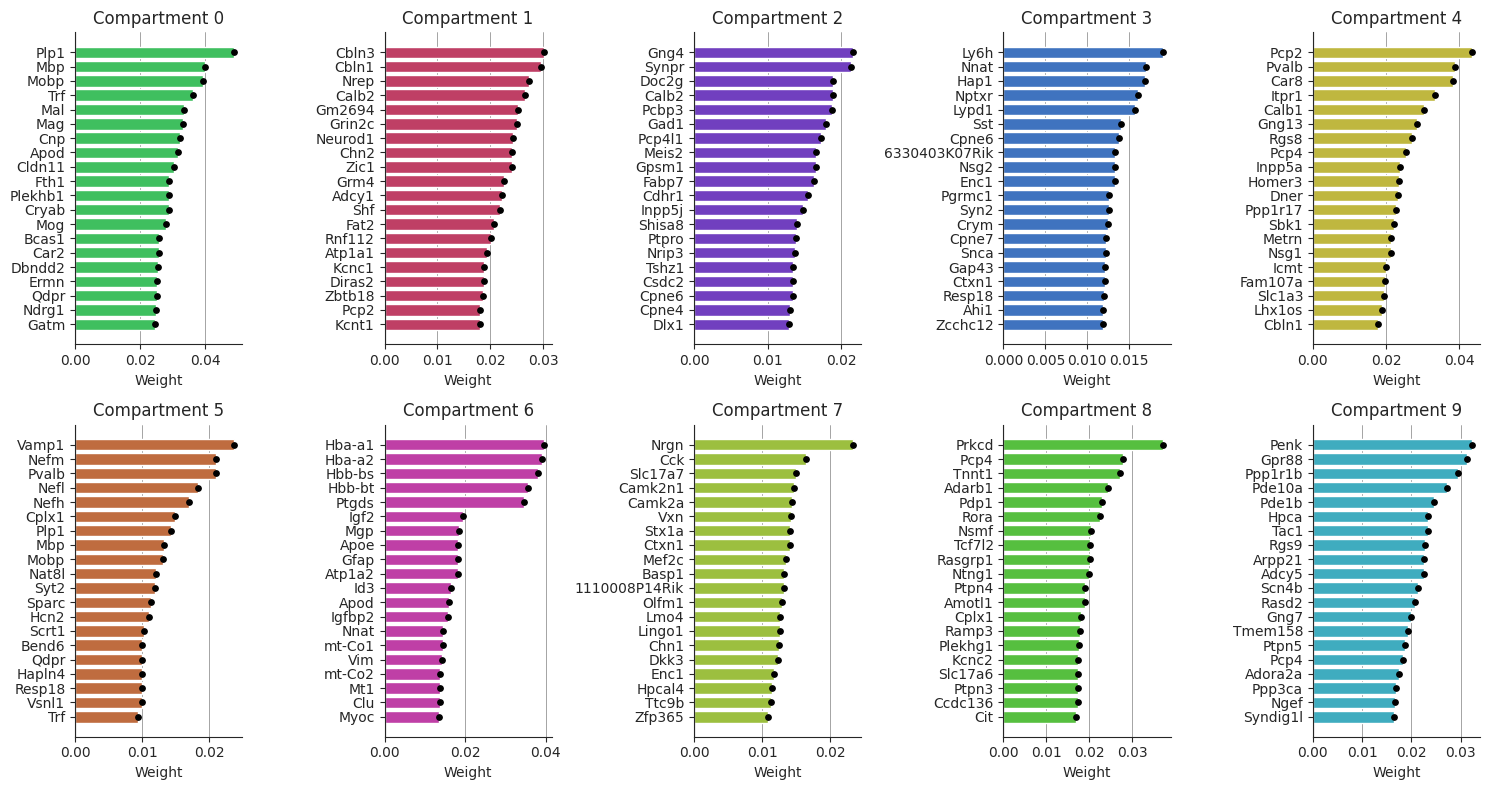

In [8]:
ch.plot_weights(adata, ncols=5)
plt.show()